# Classification with Scikit-learn

This demo runs through the classifiers discussed in class and can serve as a brief reference for how they are called. (Though see the full documentation for specific questions)


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In the lectures, we discussed a number of classifiers. We will look at some of the more practical characteristics of these classifiers on different data distributions in 2D for easy visualization.

In [2]:
# Let's examine how the classifiers perform on very different datasets

# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# make a linearly separable dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# make swirled ellipsoids and concentric circle datasets and lump them together
datasets = [linearly_separable, 
            make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1)            
            ]
dataset_names = ["Linearly Separable", "Nearly Separable", "Circles"]

# Add uneven number of classes, etc


In [3]:
def visualize_clf(datasets, clf=None, h=0.02):
    f, axarr = plt.subplots(1, 3, figsize=(9,3))
    # iterate over datasets
    for i, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])

        if clf is not None:
            ### THIS IS THE CLASSIFICATION CODE ###
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            #######################################
            
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
#             if hasattr(clf, "decision_function"):
#                 Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#             else:
#                 Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            axarr[i].contourf(xx, yy, Z, cmap=cm, alpha=.5)

        # Plot the training points
        axarr[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        axarr[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        axarr[i].set_xlim(xx.min(), xx.max())
        axarr[i].set_ylim(yy.min(), yy.max())
        axarr[i].set_xticks(())
        axarr[i].set_yticks(())
        axarr[i].set_title(dataset_names[i])  
    f.tight_layout()
    return f, axarr

(<matplotlib.figure.Figure at 0x104b53860>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x106bd42e8>,
       dtype=object))

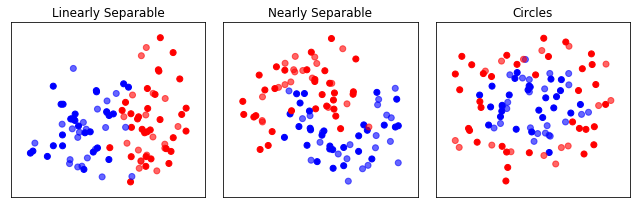

In [4]:
visualize_clf(datasets)

As we can see, we are working with data that is linearly separable in 2D, data that is nonlinearly separable in 2D, and data that separate on non-obvious dimensions.

## Classification
Calling different classifiers from scikit-learn simply amounts to knowing their names-- several that we have covered are imported below. The free parameters for these classifiers will be annotated. These free parameters can be tuned using cross validation (see "Model tuning" demo).

They can all be run using the following lines:

clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)


In [5]:
# Linear Discriminant analysis- we include for completeness
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()

Text(77,0.5,'LDA')

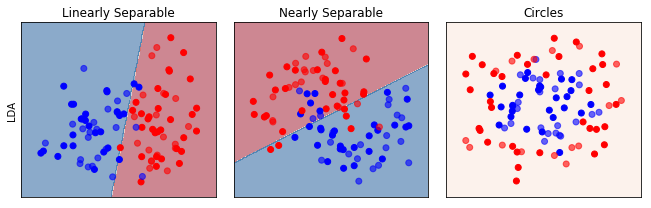

In [6]:
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("LDA")

Text(77,0.5,'Logistic Regression')

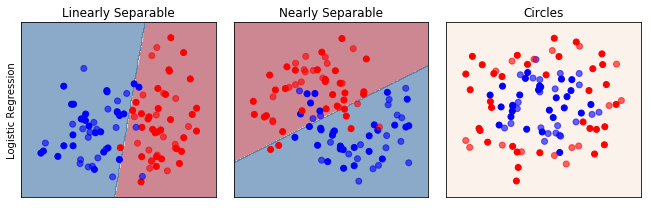

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("Logistic Regression")

Text(77,0.5,'GNB')

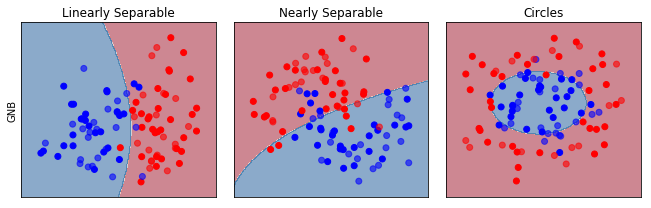

In [8]:
# Naive Bayes: Notice that Naive Bayes and 
# Linear Discrimant analysis technically model data as gaussians. It turns out
# that QuadraticDiscriminantAnalysis is a special case of Naive Bayes.
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = GaussianNB()
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("GNB")

# clf = QuadraticDiscriminantAnalysis()
# visualize_clf(datasets, clf)

Text(77,0.5,'KNN-3')

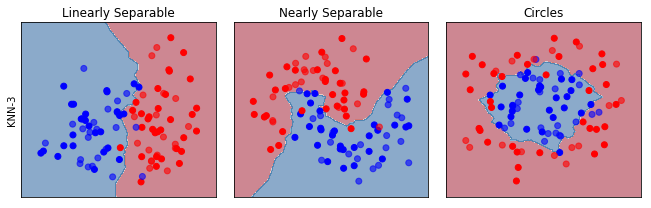

In [10]:
# K-NN
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7)  # number of neighbors
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("KNN-3")

Text(77,0.5,'Decision Tree (depth 5)')

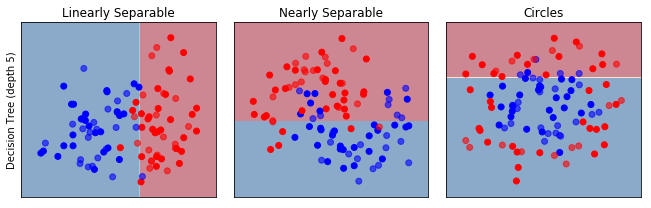

In [15]:
# Trees and Forests
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=1)  # We can set the max depth of our tree to prevent overfitting
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("Decision Tree (depth 5)")

Text(77,0.5,'Random Forest (10 trees)')

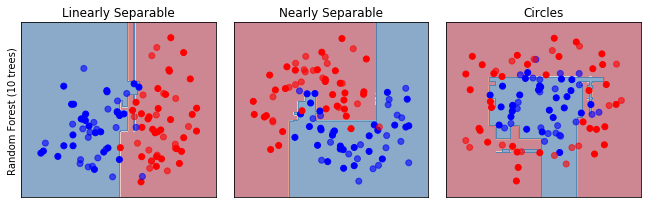

In [19]:
# bagging/forests/boosting
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# we specify the max depth of each tree, as well as set the number of trees in our random forest
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("Random Forest (10 trees)")

# do we overfit?

Text(77,0.5,'RBF-NuSVC-0.5')

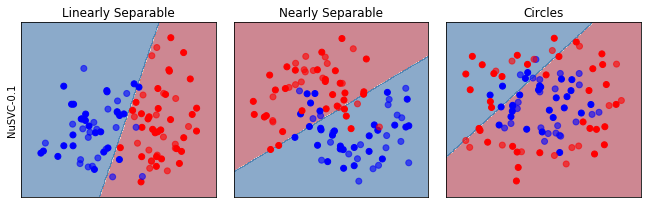

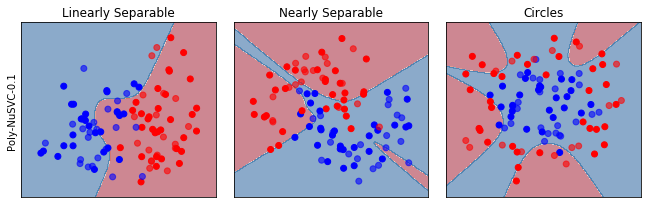

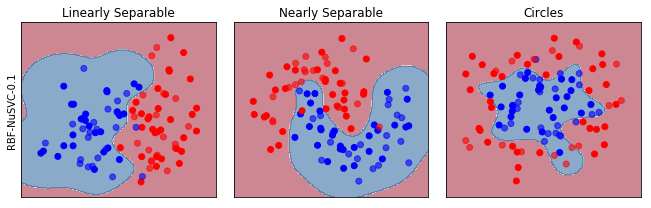

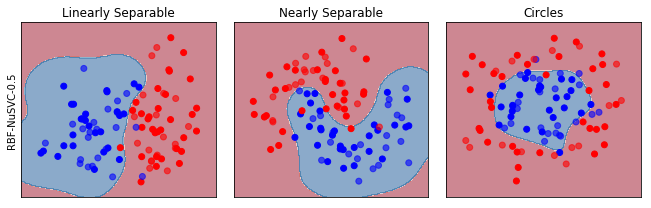

In [21]:
# SVM
from sklearn.svm import SVC, NuSVC

# Nu: C (from in class) / total number of samples
clf = NuSVC(kernel="linear", nu=0.1)
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("NuSVC-{}".format(0.1))

clf = NuSVC(kernel="poly", nu=.3, degree=5)
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("Poly-NuSVC-{}".format(0.1))


# Nu: C (from in class) / total number of samples, gamma: radial basis function parameter
clf = NuSVC(gamma=2, nu=0.1, kernel="rbf")
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("RBF-NuSVC-{}".format(0.1))


clf = NuSVC(gamma=2, nu=0.5, kernel="rbf")
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("RBF-NuSVC-{}".format(0.5))


Text(77,0.5,'RBF-SVC-10')

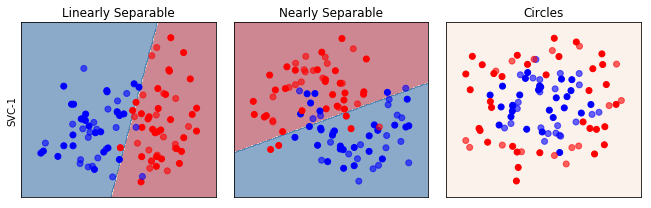

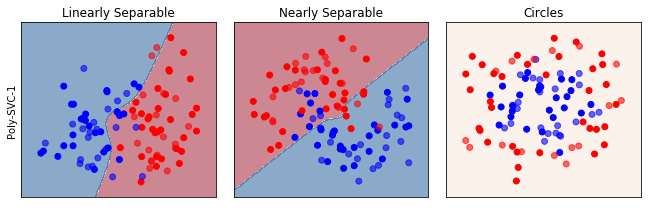

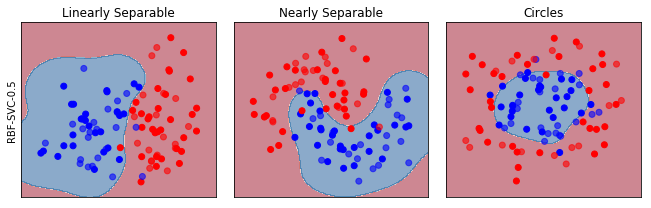

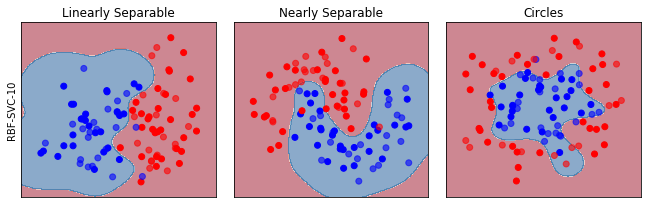

In [22]:
# C (from scikit-learn-SVC) is inversely related to nu

# C: The width of the margin
clf = SVC(kernel="linear", C=1)
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("SVC-{}".format(1))

clf = SVC(kernel="poly", C=1, degree=3)
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("Poly-SVC-{}".format(1))


# C: width of the margin, gamma: radial basis function parameter
clf = SVC(gamma=2, C=0.5, kernel="rbf")
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("RBF-SVC-{}".format(0.5))


clf = SVC(gamma=2, C=10, kernel="rbf")
f, axarr = visualize_clf(datasets, clf)
axarr[0].set_ylabel("RBF-SVC-{}".format(10))


While the RBF-SVM looks like it performs best on our test set, it's important to look at the decision regions. Will that model extrapolate on future data?